In [1]:
import pandas as pd

In [2]:
data_path = "../../data/data.csv"
df = pd.read_csv(data_path)

In [3]:
df.columns

Index(['name', 'url', 'text', 'tokenized_text'], dtype='object')

In [4]:
df.shape

(67, 4)

In [5]:
df

,name,url,text,tokenized_text
0,aeres-university-of-applied-sciences,https://www.aeres.eu/about-privacy/privacy-sta...,Aeres handles your data with care. Below we ex...,"['Aeres', 'handles', 'your', 'data', 'with', '..."
1,amsterdam-fashion-academy,https://www.amsterdamfashionacademy.com/privac...,Privacy Policy\nAmsterdam Fashion Academy (AFA...,"['Privacy', 'Policy', 'Amsterdam', 'Fashion', ..."
2,amsterdam-university-college,NaN,NaN,[]
3,amsterdam-university-of-applied-sciences,https://www.amsterdamuas.com/home/disclaimers/...,"Privacy\nPrivacy Statement, Cookies and Cookie...","['Privacy', 'Privacy', 'Statement', 'Cookies',..."
4,amsterdam-university-of-the-arts,https://www.ahk.nl/en/contact/privacy/,Your personal data and your privacy\nThe Amste...,"['Your', 'personal', 'data', 'and', 'your', 'p..."
...,...,...,...,...
62,wageningen-university-and-research-centre,https://www.wur.nl/en/value-creation-cooperati...,Data policy at WUR\nWUR has a policy in place ...,"['Data', 'policy', 'at', 'WUR', 'WUR', 'has', ..."
63,wageningen-university-and-research-centre,https://www.wur.nl/en/value-creation-cooperati...,Research data sharing and guidelines\nData sha...,"['Research', 'data', 'sharing', 'and', 'guidel..."
64,webster-university,https://www.webster.edu/privacy-security/priva...,"GDPR determines circumstances for collecting, ...","['GDPR', 'determines', 'circumstances', 'for',..."
65,windesheim-university-of-applied-sciences,NaN,NaN,[]


In [6]:
for i in range(df.shape[0]):
    name = df.iloc[i]['name']
    url = df.iloc[i]['url']
    text = df.iloc[i]['text']
    with open(f'policies/{name}.txt', 'w') as f:
        f.write(f"{url}\n{text}")

In [7]:
number_unique_institutes = df['name'].unique().shape[0]
number_nan_text = df['text'].isna().sum()

print(f"{number_unique_institutes} institutes have been scouted for privacy policies.")
print(f"{df.shape[0]} privacy policy urls are in the data.")
print(f"{number_nan_text} privacy policies could not be retrieved.")

48 institutes have been scouted for privacy policies.
67 privacy policy urls are in the data.
6 privacy policies could not be retrieved.


/tmp/ipykernel_6178/568281346.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=90)


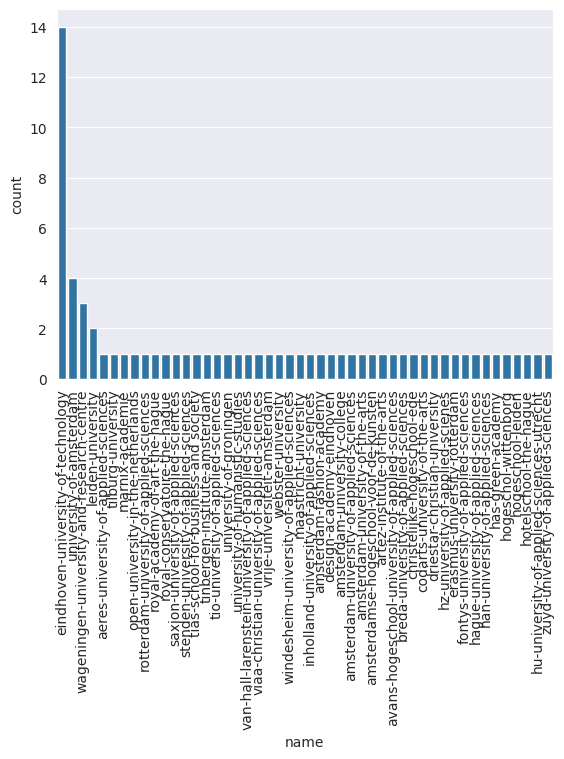

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df['name'].value_counts()
fig = sns.barplot(data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.show()

In [9]:
df['text'].str.len().mean()

10183.868852459016

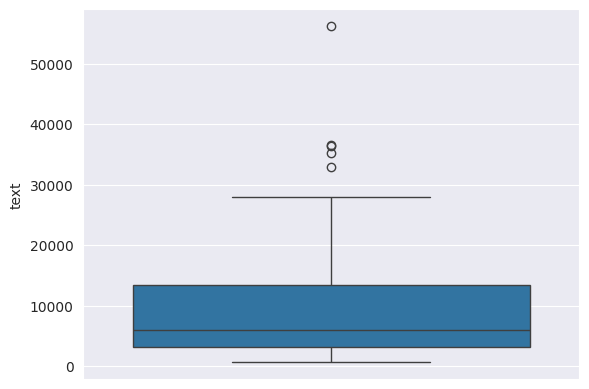

In [10]:
text_length = df['text'].str.len()
sns.boxplot(text_length)
plt.show()

In [11]:
df['text_length'] = text_length

In [12]:
df.sort_values(by='text_length')


,name,url,text,tokenized_text,text_length
5,amsterdamse-hogeschool-voor-de-kunsten,https://www.hku.nl/en/privacy-statement-discla...,HKU processes personal data in accordance with...,"['HKU', 'processes', 'personal', 'data', 'in',...",641.0
12,driestar-christian-university,https://www.driestar-christian-university.com/...,At Driestar Christian University for Teacher E...,"['At', 'Driestar', 'Christian', 'University', ...",1101.0
36,hz-university-of-applied-scienes,https://hz.nl/en/privacy-statement,HZ University of Applied Sciences respects the...,"['HZ', 'University', 'of', 'Applied', 'Science...",1382.0
62,wageningen-university-and-research-centre,https://www.wur.nl/en/value-creation-cooperati...,Data policy at WUR\nWUR has a policy in place ...,"['Data', 'policy', 'at', 'WUR', 'WUR', 'has', ...",1389.0
55,university-of-amsterdam,https://rdm.uva.nl/en/planning/uva-policy/uva-...,"University policy\nIn april 2015, the Executiv...","['University', 'policy', 'In', 'april', '2015'...",1394.0
...,...,...,...,...,...
33,hogeschool-leiden,NaN,NaN,[],NaN
57,university-of-humanistic-studies,NaN,NaN,[],NaN
58,van-hall-larenstein-university-of-applied-scie...,NaN,NaN,[],NaN
59,viaa-christian-university-of-applied-sciences,NaN,NaN,[],NaN


In [13]:
my_set = set()

for tokenized_text in df['tokenized_text']:
    words = tokenized_text.split()
    for word in words:
        my_set.add(word.lower())


In [14]:
len(my_set)

6544